# Solar Cycle Analysis

This plots data written by the `process_uncertainties.py` script.

In [36]:
import sys

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD, BIN_FREQ_PER_DAY

sns.set()

In [37]:
!ls ../../data/processed/gaussian2/k35/

ls: cannot access '../../data/processed/gaussian2/k35/': No such file or directory


In [38]:
df = pd.read_csv(
    f"../../data/processed/skew_gaussian/k200/delta_window8/processed_daysahead3_R000.csv"
)
df["current_time"] = pd.to_datetime(df["current_time"])
df

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_loc,forward_scale,forward_shape,forward_crps
0,2010-01-05 18:00:00,2010-01-08 12:00:00,320.569697,280.69,286.945140,113.765939,4.793684,NaN
1,2010-01-06 00:00:00,2010-01-08 18:00:00,312.584848,288.52,278.976718,115.550610,4.323855,NaN
2,2010-01-06 06:00:00,2010-01-09 00:00:00,304.600000,294.91,270.655343,122.578985,5.785558,NaN
3,2010-01-06 12:00:00,2010-01-09 06:00:00,318.100000,291.04,258.461969,129.503194,6.556724,NaN
4,2010-01-06 18:00:00,2010-01-09 12:00:00,305.400000,284.74,271.404384,131.147326,6.708223,NaN
...,...,...,...,...,...,...,...,...
16036,2020-12-27 18:00:00,2020-12-30 12:00:00,384.250000,476.30,380.386995,110.957610,1.106511,NaN
16037,2020-12-28 00:00:00,2020-12-30 18:00:00,469.000000,454.90,322.992492,89.207092,0.932429,NaN
16038,2020-12-28 06:00:00,2020-12-31 00:00:00,453.683333,433.50,409.877011,92.068995,0.871916,NaN
16039,2020-12-28 12:00:00,2020-12-31 06:00:00,438.366667,382.20,378.220190,108.777176,2.266154,NaN


In [39]:
sc_min = datetime(2010, 1, 1)
sc_max = datetime(2014, 6, 1)
sc_min2 = datetime(2020, 1, 1)

In [40]:
delta = timedelta(days=365)

min_start1 = sc_min
min_end1 = sc_min + delta - timedelta(days=1)
min_start2 = sc_min2 - delta
min_end2 = sc_min2 + delta

max_start = sc_max - delta
max_end = sc_max + delta

forward_idx = 0

strftime = "%Y"
min_label = "Around Solar Minimum\n(2010, 2019-2020)"

strftime = "%b%Y"
max_label = "Around Solar Maximum\n(%s - %s)" % (
    max_start.strftime(strftime),
    max_end.strftime(strftime),
)

(4350,)
(2921,)


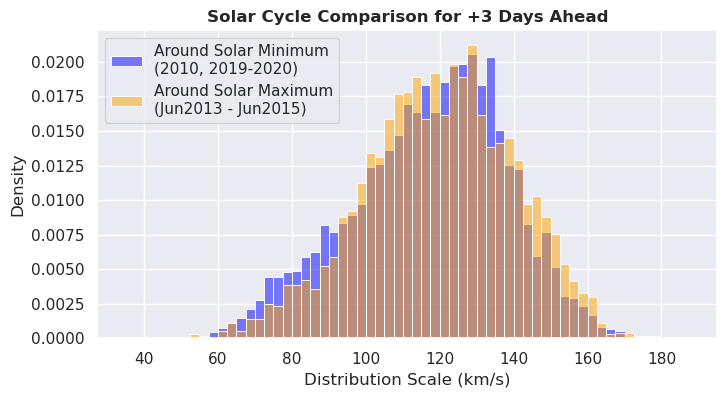

In [42]:
bins = np.arange(35, 190, 2.5)
sigmas_min = df[
    df["current_time"].between(min_start1, min_end1)
    | df["current_time"].between(min_start2, min_end2)
][f"forward_scale"]
sigmas_max = df[df["current_time"].between(max_start, max_end)][f"forward_scale"]

print(sigmas_min.shape)
print(sigmas_max.shape)

plt.figure(figsize=(8, 4))
sns.histplot(
    sigmas_min, color="blue", label=min_label, bins=bins, stat="density", alpha=0.5
)
sns.histplot(
    sigmas_max, color="orange", label=max_label, bins=bins, stat="density", alpha=0.5
)
plt.xlabel(r"Distribution Scale (km/s)")
plt.legend()
plt.title("Solar Cycle Comparison for +3 Days Ahead", fontweight="bold")
plt.savefig("../../plots/solarcycle.png", dpi=300)